<i>Méndez Pool Joan de Jesús / 160300102</i>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import itertools
%matplotlib inline

# Elementos del problema


* Suponemos que tenemos un **robot** que podemos representar como un **polígono convexo** definido sobre un punto que se utilizará como marco de referencia: $\mathcal{R}(x,y)$.
* Los movimientos del robot se limitan a **desplazamientos** (traslaciones) y rotaciones en un plano bidimensional.
* En el plano, se encuentran distribuidos una serie de **obstáculos** físicos los cuales no pueden ser atravesados por el robot: $\mathcal{P} = \{P_1, P_2, P_3, \ldots, P_n\}$.
* El **objetivo** es desplazar al robot, sobre el plano, hasta un punto fijo **sin colisionar** con los obstáculos.


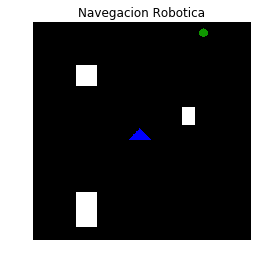

In [2]:
image = np.zeros((512,512,3), np.uint8)

#dibuja una serie de obstáculos
cv2.rectangle(image, (100,100), (150,150), (255,255,255), -1)
cv2.rectangle(image, (350,200), (380,240), (255,255,255), -1)
cv2.rectangle(image, (100,400), (150,480), (255,255,255), -1)

#ubicación del robot
[x,y] = [250, 250]
pts = np.array( [[x,y], [x-25,y+25], [x+25,y+25]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.fillPoly(image, [pts], (0,0,255))

#objetivo
cv2.circle(image, (400, 25), 10, (15,150,0), -1) 

plt.title('Navegacion Robotica')
plt.imshow(image,cmap="gray")
plt.axis("off")
plt.show()

# Transformación distancia

Una de las herramientas que pueden ser muy utiles para diseñar la trayectoria del robot es la **transformación distancia**. En esta transformación debemos asignar a cada punto del plano, el valor de la distancia al obstáculo más cercano.

Considera lo siguiente:

* Los puntos ubicados en la frontera de un obstáculo deben tener una distancia de cero
* Los puntos interiores a un obstáculo deben tener una distancia de cero o negativa

Para una imagen binaria, la transformación distancia puede evaluarse mediante el comando $\texttt{distanceTransform}$ de $\texttt{OpenCV}$

<font color="red">Actividad</font>

Explora la documentación del comando $\texttt{distanceTransform}$ y evalúa la transformación distancia de los obstáculos definidos en las celdas superiores.

1. Implementa el algoritmo de la transformación distancia definido en esta celda.
2. Evalúa la transformación distancia sobre la imagen con los obstáculos definida en la segunda celda de código de esta libreta usando:
    3. La implementación de $\texttt{OpenCV}$
    4. Tu implementación.

## OpenCV distanceTransform

<br>
<p style='text-align:justify;'>La librería <i>OpenCV</i> contiene la función denominada <i>cv2.distanceTranform()</i>, la función cv :: distanceTransform calcula la distancia aproximada o precisa de cada píxel de una imagen binaria al píxel cero más cercano. Para píxeles de imagen cero, la distancia será cero. Los párametros de la función son:</p>
    <br><br><i>cv2.distanceTransform(src, distanceType, maskSize)</i><br><br><strong style="font-size:18px;">Parámetros:</strong> 
   <ul>
       <li><strong>src:</strong> 8-bit, imagen binaria de un canal.</li>
       <li><strong>distanceType:</strong> Tipo de distancia.</li>
       <li><strong>maskSize:</strong> Tamaño de la máscara de la transformación distancia.</li>
    </ul>
<br>    
<p style='text-align:justify;'> Lo que podemos observar acerca de los párametros que usa la función, nos pide una fuente como tal(src), esto se refiere al arreglo <i>numpy</i> que representa a la imagen, pero debemos darnos cuenta que la imagen la cual contiene los obstaculos en el espacio sobre el cual es posible movernos esta representado por un valor cero, por lo que necesario transformar la imagen a binario e invertirlo para poder aplicar la función de <i>distanceTransform()</i>. Por lo que tendremos que hacer uso de otra función de la librería <i>OpenCV</i> la cual nos permitirá invertir la imagen binaria, la función recibe el nombre de <i>cv2.threshold()</i>, la función aplica un umbral de nivel fijo a la matriz de múltiples canales que representa la imagen. La función se usa normalmente para obtener una imagen de dos niveles (binaria) de una imagen en escala de grises (la comparación también podría usarse para este propósito) o para eliminar ruido, filtrar píxeles con valores demasiado pequeños o demasiado grandes. Hay varios tipos de umbrales soportados para la función. los cuales están determinados por el tipo de parámetro.
</p>
    <br><br><i>cv2.threshold(src, threshold, maxval, type[,dst])</i><br><br><strong style="font-size:18px;">Parámetros:</strong> 
   <ul>
       <li><strong>src:</strong> 8-bit o 32-bit floating, imagen binaria de múltiples canales.</li>
       <li><strong>thresh:</strong> Valor de umbral.</li>
       <li><strong>maxval:</strong> El valor máximo para usar con los tipos de umbral THRESH_BINARY y THRESH_BINARY_INV..</li>
       <li><strong>type:</strong> Tipo de umbral.</li>
   </ul>

In [3]:
def obstaculos():
    obs = np.zeros((512,512), np.uint8)
    # rescata la serie de obstáculos de la imagen a trabajar
    cv2.rectangle(obs, (100,100), (150,150), (255,255,255), -1)
    cv2.rectangle(obs, (350,200), (380,240), (255,255,255), -1)
    cv2.rectangle(obs, (100,400), (150,480), (255,255,255), -1)
    return obs

def Plot(arr, titplot):
    n = len(arr)
    fig, ax = plt.subplots(1, n, sharex=True, figsize=(10,10)) 
    for i in range(n):
        ax[i].imshow(arr[i], cmap='gray')
        ax[i].set_title(titplot[i])
        ax[i].axis('off')
    plt.tight_layout() 
    plt.show()
    
def cv2_distanceTransform(obs):
    # Para poder convertir la imagen a binario e invertir el color de la imagen es necesario aplicar la función threshold
    retval, obs_invert = cv2.threshold(obs, 1, 255, cv2.THRESH_BINARY_INV)
    # Después de obtener la imagen binarizada invertida se aplica la función distanceTransform 
    obs_distance = cv2.distanceTransform(obs_invert, cv2.DIST_LABEL_PIXEL, 3)
    return [ obs,  obs_invert, obs_distance ]

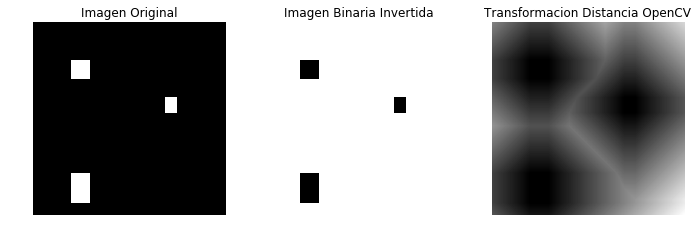

In [4]:
titplot = ['Imagen Original', 'Imagen Binaria Invertida', 'Transformacion Distancia OpenCV']
obs=obstaculos()
arr = cv2_distanceTransform(obs)
Plot(arr, titplot)

## Algoritmo Transformación Distancia

Considera una imagen binaria en la que el uno indica un obstáculo y el cero indica espacio libre

El objetivo es construir una **imagen** del mismo tamaño que la imagen original que indique la distancia de cualquier pixel al borde (de algún obstáculo) más cercano.

A la par se debe guardar, para cada pixel, las coordenadas del pixel, del borde de un obstáculo, más cercano (**raiz**).

1. Inicia la imagen de distancia con los siguientes valores:
    2. $0$ si el pixel es parte del borde de un obstáculo
    3. $10^{10}$ (un número muy grande) en caso contrario
2. Construye una $\texttt{cola}$ en donde guardarás diferentes pixeles
3. Recorre la imagen e ingresa a la cola cada pixel que tenga un valor de distancia de cero
4. Para todo pixel, $p$, que ingrese a la cola indica que su raiz es el mismo pixel, $p$. 
4. Mientras la cola no esté vacía:
    5. Extrae el pixel con mayor prioridad en la cola [pixel actual] y recorre sus 8 vecinos más cercanos:
    6. Para cada uno de los 8 vecinos más cercanos:
        6. Compara la distancia que hay entre el pixel vecino más cercanos y la raíz del pixel actual.
        7. Si la distancia es menor a la registrada en el pixel vecino, entonces actualiza la distancia y cambia la raíz del pixel vecino (para que sea igual a la del pixel actual). Ingresa el pixel vecino a la cola.

In [5]:
def vecinos():
    vecinos= [ -1, 0, 1 ]
    permuta = [(-1,-1)]
    permuta.extend(list(itertools.permutations(vecinos, 2)))
    permuta.append((1,1))
    # Valores que nos permiten navegar en el grid a los 8 vecinos más cercanos por medio 
    # del índice de las coordenadas alrededor del pixel actual
    # permuta = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    return permuta

def Invierte_Imagen(obs):
    # 1. Inicia la imagen de distancia con los siguientes valores:
    trans_dist = np.zeros((obs.shape), np.uint8)
    for (i,row) in enumerate(obs):
        for (j,value) in enumerate(row):
            # A. 255 es el valor del borde de los obstáculos
            # B. 0 si el pixel es parte del borde de un obstáculo
            if (value == 255):
                trans_dist[i][j] = 0             
            # C. 10^10 (un número muy grande) en caso contrario
            else:
                trans_dist[i][j] = 10**3
    return trans_dist

def Pixel_queue(trans_dist):
    # 2. Construye una cola en donde guardarás diferentes pixeles
    queue = []
    # 3. Recorre la imagen e ingresa a la cola cada pixel que tenga un valor de distancia de cero
    for (i,tran) in enumerate(trans_dist):
        for (j,t) in enumerate(tran):
            if (t == 0):
                # 4. Para todo pixel, 𝑝, que ingrese a la cola indica que su raiz es el mismo pixel, 𝑝. 
                queue.append([(i,j),(i,j)])
    return queue

def distanceTranform(obs):
    # 1. Inicia la imagen de distancia con valores 0 para los obstáculos y 10^10 para el espacio de navegación libre:
    trans_dist = Invierte_Imagen(obs)
    bi = trans_dist.copy()
    # 2. Construye una cola en donde guardarás diferentes pixeles
    queue = Pixel_queue(trans_dist)
    # 5. Mientras la cola no esté vacía:
    while queue:
        # E. Extrae el pixel con mayor prioridad en la cola [pixel actual] y recorre sus 8 vecinos más cercanos:
        pixel = queue.pop(0)
        cx, cy = pixel[0]
        rx, ry = pixel[1]
        for (x,y) in vecinos():        # F. Para cada uno de los 8 vecinos más cercanos:

            flag = np.logical_and([cx+x >= 0, cy+y >= 0], [cx+x < trans_dist.shape[0], cy+y < trans_dist.shape[1]])
            if (np.logical_and(flag[0], flag[1])):
                # f. Compara la distancia que hay entre los vecinos más cercanos y el pixel raíz del pixel actual.
                # Distancia entre dos puntos
                dist = np.sqrt( ((cx+x) - rx)**2 + ((cy+y) - ry)**2)
                # g. Si la distancia es menor a la registrada en el pixel vecino, entonces actualiza la distancia y 
                # cambia la raíz del pixel vecino (para que sea igual a la del pixel actual).
                if (dist < trans_dist[cx+x][cy+y]):
                    trans_dist[cx+x][cy+y] = dist
                    # Ingresa el pixel vecino a la cola.
                    queue.append([(cx+x,cy+y),(rx,ry)])
    return [ obs, bi, trans_dist ]

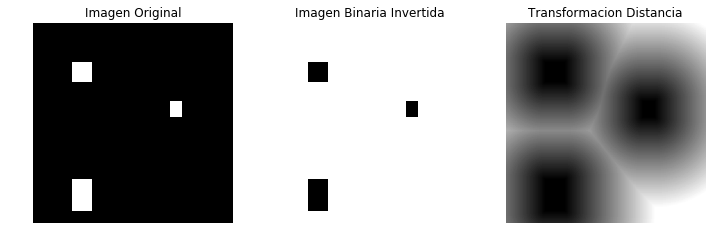

In [6]:
titplot = ['Imagen Original', 'Imagen Binaria Invertida', 'Transformacion Distancia']
obs=obstaculos()
array = distanceTranform(obs)
Plot(array, titplot)

In [10]:
print(arr[2][0])

[200. 199. 198. 197. 196. 195. 194. 193. 192. 191. 190. 189. 188. 187.
 186. 185. 184. 183. 182. 181. 180. 179. 178. 177. 176. 175. 174. 173.
 172. 171. 170. 169. 168. 167. 166. 165. 164. 163. 162. 161. 160. 159.
 158. 157. 156. 155. 154. 153. 152. 151. 150. 149. 148. 147. 146. 145.
 144. 143. 142. 141. 140. 139. 138. 137. 136. 135. 134. 133. 132. 131.
 130. 129. 128. 127. 126. 125. 124. 123. 122. 121. 120. 119. 118. 117.
 116. 115. 114. 113. 112. 111. 110. 109. 108. 107. 106. 105. 104. 103.
 102. 101. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 101. 102. 103.
 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117.
 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131.
 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 

In [9]:
print(array[2][0])

[141 140 140 139 138 137 137 136 135 135 134 133 133 132 131 131 130 129
 129 128 128 127 126 126 125 125 124 123 123 122 122 121 120 120 119 119
 118 118 117 117 116 116 115 115 114 114 113 113 112 112 111 111 110 110
 110 109 109 108 108 108 107 107 106 106 106 105 105 105 104 104 104 104
 103 103 103 103 102 102 102 102 101 101 101 101 101 101 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 101 101 101 101 101 101 102 102 102 102 103 103 103 103 104
 104 104 104 105 105 105 106 106 106 107 107 108 108 108 109 109 110 110
 110 111 111 112 112 113 113 114 114 115 115 116 116 117 117 118 118 119
 119 120 120 121 122 122 123 123 124 125 125 126 126 127 128 128 129 129
 130 131 131 132 133 133 134 135 135 136 137 137 13

# Conclusión

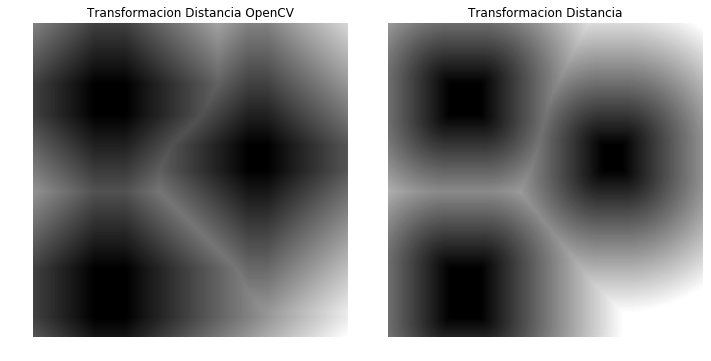

In [7]:
titplot = ['Transformacion Distancia OpenCV', 'Transformacion Distancia']
A = [arr[2], array[2]]
Plot(A, titplot)

<p style="text-align:justify">Al comparar las dos imágenes podemos observar una muy clara diferencia ya que como tal no obtenemos la misma imagen que nos proporciona la recuperación de la <i>Transformación Distancia</i> de la función <i>cv2.distanceTransform()</i> de la librería <i>OpenCV</i>, pero podemos apreciar que poseen una similitud en cuanto a la difuminación de la imagen. La intención de la aplicación de dicho algoritmo es anticipar la ubicación de las tonalidades oscuras para distinguir que tan cerca estamos de colisionar con algún obstáculo, por lo cual cuando navegamos sobre el grid podemos por medio del cálculo de la <i>Transformación Distancia</i> conocer que tan cerca están los objetos físicos con los cuales podemos intersectar, entre más oscura sea la tonalidad del Pixel más cerca no encontramos de un obstáculo.
<br><br>
Un punto importante a tomar en cuenta es el tiempo de ejecución que realiza el algoritmo compuesto con pseudocódigo descrito en el <i>notebook</i>, ya que su tiempo de ejecución toma un par de minutos para lograr realizar la operación con éxito en comparación con las funciones utilizada de la librería mencionada anteriormente que toma segundos obtener los resultados de la <i>Transformación Distancia</i>.</p>